In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np


# Load data
df = pd.read_csv("Global_Development_Indicators_2000_2020.csv")

# Remove columns that are not useful for the model
drop_cols = ['country_code', 'country_name', 'currency_unit', 'region', 'gdp_per_capita', 'calculated_gdp_per_capita']
df = df.drop(columns=drop_cols)

# Delete rows without target
df = df.dropna(subset=['gdp_usd'])

# Separate numerical and categorical variables
categorical = ['income_group']
numerical = [col for col in df.columns if col not in categorical + ['gdp_usd']]


# Preprocessing: OneHot for categorical, nothing for numeric
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
], remainder='passthrough')

# Create the modeling pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Separate data into features and targets
X = df[categorical + numerical]
y = df['gdp_usd']


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the model
model.fit(X_train, y_train)


# Predict and evaluate
y_pred = model.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 875942804735.288
R² Score: 0.9877328441020745


📊 RMSE: 904,641,319,526.01
📈 R² Score: 0.9869
📉 MAPE: 13.30%


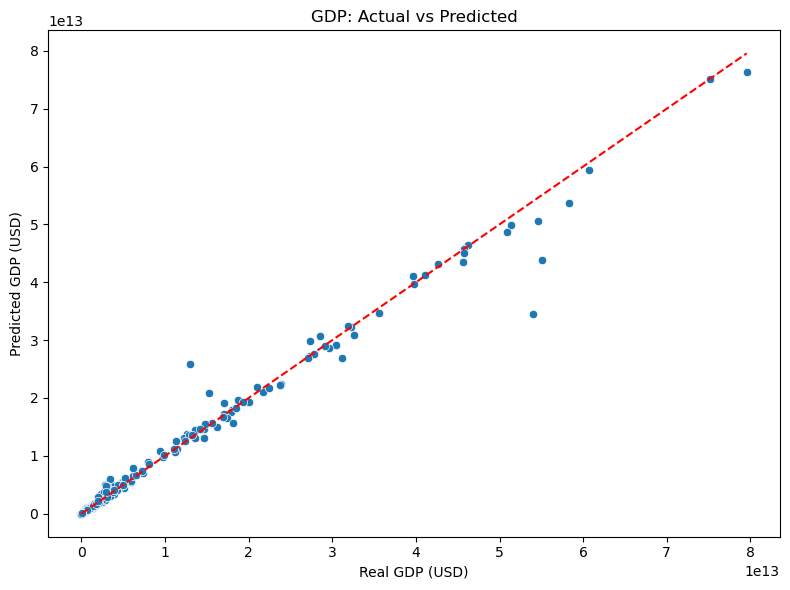


🔍 Countries with the highest percentage error:
                        country_name  year        y_true        y_pred  \
1259                        Kiribati  2020  1.975088e+08  1.827278e+09   
1342                Marshall Islands  2019  2.394622e+08  1.304841e+09   
5408                      Seychelles  2020  1.059886e+09  3.393737e+09   
5471                        Tanzania  2020  6.240971e+10  1.800780e+11   
3729       Sint Maarten (Dutch part)  2012  9.858659e+08  2.701252e+09   
4598                         Burundi  2020  2.841786e+09  7.739100e+09   
4924                      The Gambia  2019  1.812529e+09  4.925432e+09   
2151                         Finland  2009  2.524965e+11  6.569262e+11   
3810  St. Vincent and the Grenadines  2009  6.749222e+08  1.748578e+09   
1659                     Timor-Leste  2000  3.670879e+08  9.420184e+08   

         abs_error   pct_error  
1259  1.629769e+09  825.162784  
1342  1.065379e+09  444.904858  
5408  2.333851e+09  220.198241  
5471 

ValueError: Could not interpret value `contry_name` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Upload CSV
df = pd.read_csv("Global_Development_Indicators_2000_2020.csv")


# Remove irrelevant columns
drop_cols = ['country_code', 'currency_unit', 'region', 'gdp_per_capita', 'calculated_gdp_per_capita']
df_clean = df.drop(columns=drop_cols, errors='ignore')
df_clean = df_clean.dropna(subset=['gdp_usd'])

# Save country name and year for later analysis
country_year = df_clean[['country_name', 'year']].copy()

# Prepare data
categorical = ['income_group']
X = df_clean.drop(columns=['gdp_usd', 'country_name', 'year'])
y = df_clean['gdp_usd']
X_encoded = pd.get_dummies(X, columns=categorical)


# Split X, y
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Also separate country_year for the test set
cy_test = country_year.loc[y_test.index]


# Model - RandomForest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# METRICS
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"📊 RMSE: {rmse:,.2f}")
print(f"📈 R² Score: {r2:.4f}")
print(f"📉 MAPE: {mape:.2f}%")

# GRAPHIC: Predicted vs Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Real GDP (USD)")
plt.ylabel("Predicted GDP (USD)")
plt.title("GDP: Actual vs Predicted")
plt.tight_layout()
plt.show()


# ERRORS BY COUNTRY
errors_df = cy_test.copy()
errors_df['y_true'] = y_test
errors_df['y_pred'] = y_pred
errors_df['abs_error'] = np.abs(y_test - y_pred)
errors_df['pct_error'] = 100 * errors_df['abs_error'] / y_test

# Show 10 countries with the highest percentage error
top_errors = errors_df.sort_values(by='pct_error', ascending=False).head(10)

print("\n🔍 Countries with the highest percentage error:")
print(top_errors[['country_name', 'year', 'y_true', 'y_pred', 'abs_error', 'pct_error']])


# Chart: Percentage errors by country (top 10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_errors, x='pct_error', y='country_name', palette='rocket', hue="contry_name")
plt.title("Top 10 countries with the highest percentage error in GDP prediction")
plt.xlabel("Percentage error (%)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_18624\926819681.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, y='feature', x='importance', palette='viridis')


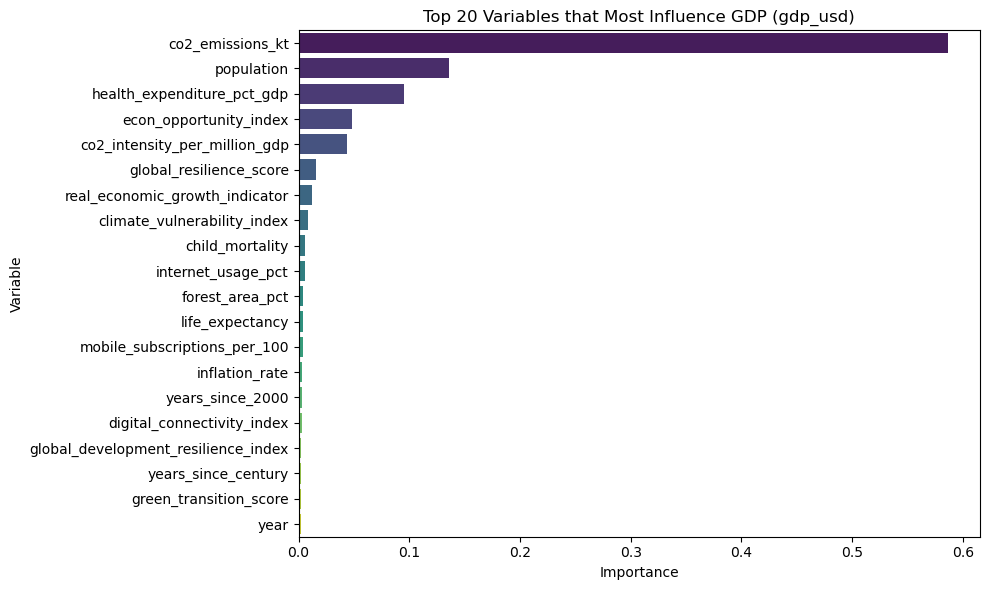

In [3]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Upload the CSV
df = pd.read_csv("Global_Development_Indicators_2000_2020.csv")

# Clean up unnecessary columns
drop_cols = ['country_code', 'country_name', 'currency_unit', 'region', 'gdp_per_capita', 'calculated_gdp_per_capita']
df_clean = df.drop(columns=drop_cols, errors='ignore')
df_clean = df_clean.dropna(subset=['gdp_usd'])

# Variables
categorical = ['income_group']
X = df_clean.drop(columns=['gdp_usd'])
y = df_clean['gdp_usd']

# Encode categorical
X_encoded = pd.get_dummies(X, columns=categorical)


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Importance
importances = model.feature_importances_
features = X_encoded.columns

importance_df = pd.DataFrame({'feature': features, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=False).head(20)

# Chart
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, y='feature', x='importance', palette='viridis')
plt.title('Top 20 Variables that Most Influence GDP (gdp_usd)')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

In [4]:
####################################### LINEAL REGRESSION 

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Load data
df = pd.read_csv("Global_Development_Indicators_2000_2020.csv")


# Clean irrelevant columns
drop_cols = ['country_code', 'currency_unit', 'region', 'gdp_per_capita', 'calculated_gdp_per_capita']
df_clean = df.drop(columns=drop_cols, errors='ignore')
df_clean = df_clean.dropna(subset=['gdp_usd'])

# Save country and year
country_year = df_clean[['country_name', 'year']].copy()

# Prepare data
categorical = ['income_group']
X = df_clean.drop(columns=['gdp_usd', 'country_name', 'year'])
y = df_clean['gdp_usd']
X_encoded = pd.get_dummies(X, columns=categorical)


# Fill missing values with the mean
X_encoded = X_encoded.fillna(X_encoded.mean())


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Linear Regression Model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Predictions
y_pred = model_lr.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"📊 RMSE: {rmse:,.2f}")
print(f"📈 R² Score: {r2:.4f}")
print(f"📉 MAPE: {mape:.2f}%")

📊 RMSE: 7,912,026,886,991.86
📈 R² Score: -0.0008
📉 MAPE: 126828.29%


In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# ============================
# 1. Load and prepare data
# ============================
df = pd.read_csv("Global_Development_Indicators_2000_2020.csv")

# Remove irrelevant columns
drop_cols = ['country_code', 'currency_unit', 'region', 'gdp_per_capita', 'calculated_gdp_per_capita']
df_clean = df.drop(columns=drop_cols, errors='ignore')
df_clean = df_clean.dropna(subset=['gdp_usd'])

# Categorical and numerical variables
categorical = ['income_group']
X = df_clean.drop(columns=['gdp_usd', 'country_name', 'year'])
y = df_clean['gdp_usd']

# One-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical)

# For models that do not accept NaN (LinearRegression and RandomForest) we fill with the mean
X_filled = X_encoded.fillna(X_encoded.mean())

# ============================
# 2. Define models
# ============================
modelos = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42)  # acepta NaN
}

# ============================
# 3. Evaluate each model
# ============================
resultados = []

for nombre, modelo in modelos.items():
    if nombre == "HistGradientBoosting":
        X_train, X_test, y_train, y_test = train_test_split(
            X_encoded, y, test_size=0.2, random_state=42
        )
    else:
        X_train, X_test, y_train, y_test = train_test_split(
            X_filled, y, test_size=0.2, random_state=42
        )

    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    resultados.append([nombre, rmse, r2, mape])

# ============================
# 4. Show table
# ============================
df_resultados = pd.DataFrame(resultados, columns=["Modelo", "RMSE", "R²", "MAPE (%)"])
df_resultados["RMSE"] = df_resultados["RMSE"].apply(lambda x: f"{x:,.2f}")
df_resultados["R²"] = df_resultados["R²"].apply(lambda x: f"{x:.4f}")
df_resultados["MAPE (%)"] = df_resultados["MAPE (%)"].apply(lambda x: f"{x:.2f}")

print("\n📊 Model Comparison")
print(df_resultados.to_string(index=False))


📊 Model Comparison
              Modelo                 RMSE      R²  MAPE (%)
       Random Forest   936,055,602,884.57  0.9860     27.34
   Linear Regression 7,912,026,886,991.86 -0.0008 126828.29
HistGradientBoosting 1,270,656,491,065.79  0.9742   1746.17
